In [1]:
!pip list

Package              Version
-------------------- -----------
anyio                3.6.1
appnope              0.1.3
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
asttokens            2.0.8
attrs                22.1.0
Babel                2.10.3
backcall             0.2.0
beautifulsoup4       4.11.1
bleach               5.0.1
certifi              2022.9.14
cffi                 1.15.1
charset-normalizer   2.1.1
click                8.1.7
construct            2.10.68
contourpy            1.0.5
cycler               0.11.0
debugpy              1.6.3
decorator            5.1.1
defusedxml           0.7.1
distlib              0.3.4
dl-course            0.0.0
entrypoints          0.4
executing            1.0.0
fastjsonschema       2.16.2
filelock             3.6.0
fonttools            4.37.3
idna                 3.4
importlib-metadata   4.12.0
ipykernel            6.15.3
ipython              8.5.0
ipython-genutils     0.2.0
jedi                 0.18.1
Jinja2               3.1.2
joblib

In [2]:
# def plot_mes_count_by_month(year: int, messages_count: list[list], title:str=None) -> None:
#     years = [2018, 2019, 2020, 2021, 2022, 2023]
    
#     plt.rc('lines', linewidth=3)
#     fig, ax = plt.subplots(figsize=(15, 5))
    
    
#     line1, = ax.plot(years,messages_count[0], label='PVA')
#     plt.scatter(years,messages_count[0])
    
#     line2, = ax.plot(years, messages_count[1], label='AMI')
#     plt.scatter(years, messages_count[1])
    
#     ax.legend(handlelength=4)
#     plt.title(title)
#     plt.savefig('Number_ofMes_buYear.pdf')
#     plt.show()


# def plot_all_mes(message_stats: list[list]) -> None:
#     species = ('2018', '2019', '2020', '2021', '2022', '2023')
#     counts = {
#         'PVA': np.array(message_stats[0]),
#         'AMI': np.array(message_stats[1]),
#     }
#     # width = 0.6  # the width of the bars: can also be len(x) sequence
    


#     fig, ax = plt.subplots()
#     bottom = np.zeros(6)

#     for name, count in counts.items():
#         p = ax.bar(species, count, width, label=name, bottom=bottom)
#         bottom += count

#         ax.bar_label(p, label_type='center', padding=3)

#     ax.set_title('Number of messages by year')
#     ax.legend()

#     plt.savefig('number_of_mes_by_year.pdf')
#     plt.show()


# def plot_bar(bars: list, items: dict):
#     x = np.arange(len(bars))  # the label locations
#     width = 0.25  # the width of the bars
#     multiplier = 0.5

#     fig, ax = plt.subplots(layout='constrained')
#     # ax.grid(zorder=0)
#     for attribute, measurement in items.items():
#         offset = width * multiplier
#         rects = ax.bar(x + offset, measurement, width, label=attribute)
#         ax.bar_label(rects, padding=0, rotation=20)
#         multiplier += 1

#     # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax.set_ylabel('Messages Count')
#     ax.set_title('Numbers of messages by year')
#     ax.set_xticks(x + width, bars)
#     ax.legend(loc='upper left', ncols=2)
#     # ax.set_axisbelow(True)


#     # ax.set_ylim(0, 250)
#     plt.savefig('1.pdf')
#     plt.show()
#     return 0


In [3]:
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
def review_to_words(message_text):
    letters_only = re.sub("[^a-zа-яёA-ZА-ЯЁ]|(^\W+)|(\W+$)", " ", message_text)
    # letters_only = re.sub(r'(^\W+)|(\W+$)', '', letters_only)
    words = letters_only.lower().strip().split()                        
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join(meaningful_words))

In [5]:
def plot_stats_bar(bars: list, 
                   messages_stats: dict[str: list[int]], 
                   title: str = None,
                   y_label: str = None,
                   file_name: str = None) -> None:
    
    # width = 0.6  # the width of the bars: can also be len(x) sequence
    width = 0.25  # the width of the bars
    multiplier = 0.5
    x = np.arange(len(bars))
    
    fig, ax = plt.subplots(layout='constrained')
    bottom = np.zeros(6)
    
    for attribute, measurement in messages_stats.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=0, rotation=20)
        multiplier += 1
        
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(x + width, bars)
    ax.legend(loc='upper left', ncols=len(messages_stats.keys()))
    # ax.set_axisbelow(True)


    # ax.set_ylim(0, 250)
    if file_name:
        plt.savefig(file_name)
    plt.show()


In [6]:
def plot_stats_line(messages_count: list[list], 
                    title:str=None,
                    file_name: str = None,
                    x_ticks: list[str] = None,
                    labels: list[str] = None,
                    y_label: str = None) -> None:
    
    if not labels:
        labels = ['']*len(messages_count[0])
    markers = ["d", "v", "s", "*", "^", "d", "v", "s", "*", "^"]
    arange = np.linspace(1, len(messages_count[0]), len(messages_count[0]))
    plt.rc('lines', linewidth=2.5)
    fig, ax = plt.subplots(figsize=(15, 5))
    
    for ind, item in enumerate(messages_count):
        line, = ax.plot(arange, item, label=labels[ind])
        plt.scatter(arange, item, marker=markers[ind], s=150)
    
    ax.set_ylabel(y_label)
    ax.set_xticks(arange, x_ticks)
    ax.legend()
    ax.grid(True)
    plt.title(title)
    
    if file_name:
        plt.savefig(file_name)
    plt.show()


In [7]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stops = set(stopwords.words("russian"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vladyti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df = pd.read_csv('telegram_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23713 entries, 0 to 23712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   msg_id           23713 non-null  int64 
 1   sender           23713 non-null  object
 2   sender_id        23713 non-null  object
 3   reply_to_msg_id  23713 non-null  int64 
 4   date             23713 non-null  object
 5   msg_type         23713 non-null  object
 6   msg_content      23713 non-null  object
 7   has_mention      23713 non-null  int64 
 8   has_email        23713 non-null  int64 
 9   has_phone        23713 non-null  int64 
 10  has_hashtag      23713 non-null  int64 
 11  is_bot_command   23713 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 2.2+ MB


Converting the database to a form that is convenient to use.

In [9]:
df['date'] = pd.to_datetime(df['date'])
df.loc[df['sender'] == 'Vlad Yti', 'sender'] = 'PVA'
df.loc[df['sender'] == 'Й', 'sender'] = 'AMI'

In [10]:
# df.columns

In [11]:
df.drop(['has_email', 'has_email', 'has_hashtag', 'is_bot_command', 'has_mention', 'has_phone'], axis=1, inplace=True)

In [12]:
df.loc[df.msg_type != 'text', 'msg_content'] = ''

In [13]:
df.msg_content = df.msg_content.apply(lambda s: review_to_words(s))

In [14]:
result = Counter(" ".join(df.loc[df['msg_content'] != '', 'msg_content'].values.tolist()).split(" "))


In [15]:
result.most_common(10)

[('это', 1902),
 ('просто', 713),
 ('чувак', 594),
 ('ещё', 568),
 ('тебе', 413),
 ('блять', 372),
 ('чел', 345),
 ('максим', 304),
 ('всё', 303),
 ('бля', 287)]

In [16]:
# counting messages by text condition

PVA_mes_count = []
AMI_mes_count = []
for i in range(6):
    PVA_mes_count.append(df.where((df.date.dt.year == 2018 + i)
                                  & (df.msg_type == 'text')
                                  & (df.sender == 'PVA')).count().msg_id)
    AMI_mes_count.append(df.where((df.date.dt.year == 2018 + i)
                                  & (df.msg_type == 'text')
                                  & (df.sender == 'AMI')).count().msg_id)
    

years = (2018, 2019, 2020, 2021, 2022, 2023)
it = {'PVA': PVA_mes_count, 'AMI': AMI_mes_count}

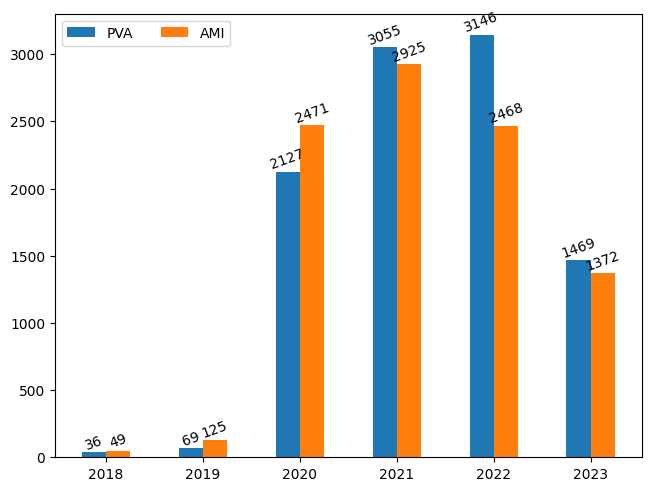

In [17]:
plot_stats_bar(years, it)

In [18]:
#counting all messages
PVA_mes_count = []
AMI_mes_count = []
for i in range(6):
    PVA_mes_count.append(df.where((df.date.dt.year == 2018 + i)
                                  & (df.sender == 'PVA')).count().msg_id)
    AMI_mes_count.append(df.where((df.date.dt.year == 2018 + i)
                                  & (df.sender == 'AMI')).count().msg_id)
    

years = (2018, 2019, 2020, 2021, 2022, 2023)
it = {'PVA': PVA_mes_count, 'AMI': AMI_mes_count}

In [19]:
PVA_month_mes_count = {i:[] for i in range(2018, 2024)}
AMI_month_mes_count = {i:[] for i in range(2018, 2024)}

for year in PVA_month_mes_count.keys():
    for i in range(12):
        PVA_month_mes_count[year].append(df.where((df.date.dt.year == year)
                                  & (df.msg_type == 'text')
                                  & (df.sender == 'PVA') 
                                  & (df.date.dt.month == 1 + i)).count().msg_id)
        AMI_month_mes_count[year].append(df.where((df.date.dt.year == year)
                                  & (df.msg_type == 'text')
                                  & (df.sender == 'AMI') 
                                  & (df.date.dt.month == 1 + i)).count().msg_id)
    

In [20]:

x_ticks1 = ['January', 'February', 'March', 
           'April', 'May', 'June', 
           'July', 'August', 'September', 
           'October', 'November', 'December']

x_ticks2 = ['2018', '2019', '2020', '2021', '2022', '2023']


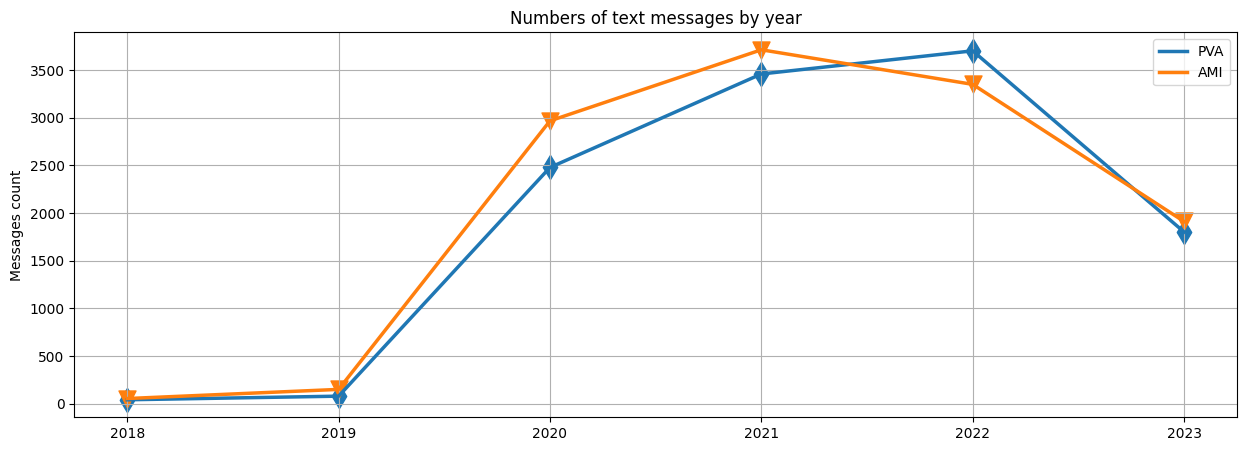

In [64]:
plot_stats_line([PVA_mes_count, AMI_mes_count], 
                x_ticks=x_ticks2, labels=['PVA', 'AMI'], 
                title='Numbers of text messages by year', 
                file_name='11.pdf', 
                y_label='Messages count')
# plot_mes_count_by_month([[i-j for i, j in zip(PVA_mes_count, AMI_mes_count)]], plot_by='year')

In [22]:
# plot_mes_count_by_month([PVA_month_mes_count[2019], AMI_month_mes_count[2019]])

In [23]:
# plot_mes_count_by_month(2020, [PVA_month_mes_count[2020], AMI_month_mes_count[2020]])

In [24]:
# plot_mes_count_by_month(2021, [PVA_month_mes_count[2021], AMI_month_mes_count[2021]])

In [25]:
# plot_mes_count_by_month(2022, [PVA_month_mes_count[2022], AMI_month_mes_count[2022]])

In [26]:
# plot_mes_count_by_month(2023, [PVA_month_mes_count[2023], AMI_month_mes_count[2023]])

In [27]:
# df.msg_type.unique()

In [28]:
# df.loc[df.msg_content.str.contains('хах')].msg_content.count()

In [29]:
# df.loc[df.msg_type == 'audio_file'].count()

In [30]:
PVA_month_photo_count = {i:[] for i in range(2018, 2024)}
AMI_month_photo_count = {i:[] for i in range(2018, 2024)}

for year in PVA_month_mes_count.keys():
    for i in range(12):
        PVA_month_photo_count[year].append(df.where((df.date.dt.year == year)
                                  & (df.msg_type == 'photo')
                                  & (df.sender == 'PVA') 
                                  & (df.date.dt.month == 1 + i)).count().msg_id)
        AMI_month_photo_count[year].append(df.where((df.date.dt.year == year)
                                  & (df.msg_type == 'photo')
                                  & (df.sender == 'AMI') 
                                  & (df.date.dt.month == 1 + i)).count().msg_id)

In [31]:
# PVA_month_photo_count

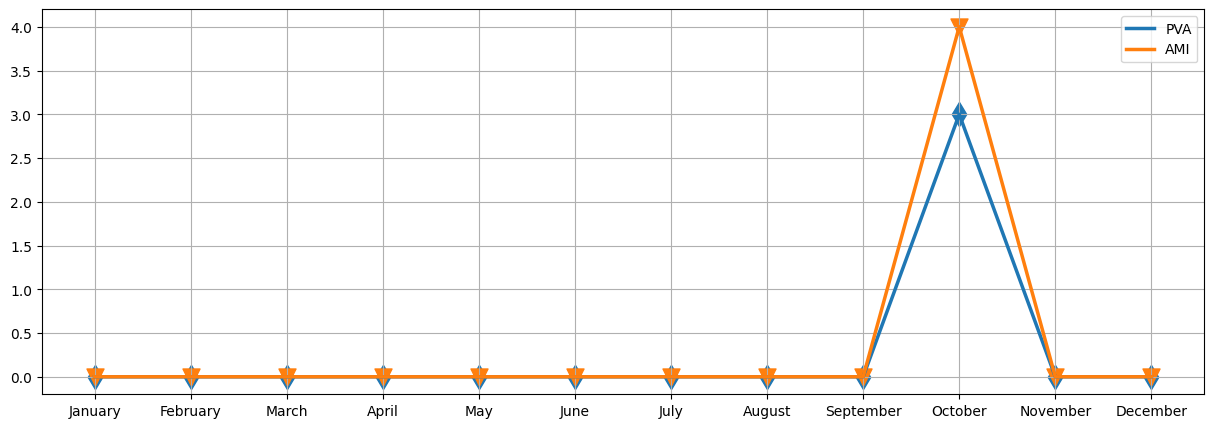

In [32]:
plot_stats_line([PVA_month_photo_count[2018], AMI_month_photo_count[2018]], x_ticks=x_ticks1, labels=['PVA', 'AMI'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


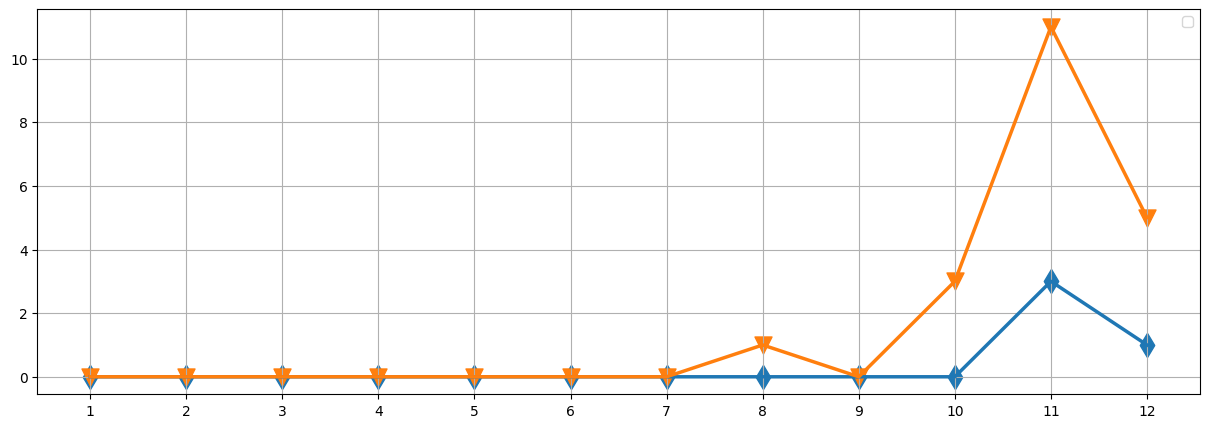

In [33]:
plot_stats_line([PVA_month_photo_count[2019], AMI_month_photo_count[2019]])

In [34]:
# plot_mes_count_by_month(2020, [PVA_month_photo_count[2020], AMI_month_photo_count[2020]])

In [35]:
# plot_mes_count_by_month(2021, [PVA_month_photo_count[2021], AMI_month_photo_count[2021]])

In [36]:
# plot_mes_count_by_month(2022, [PVA_month_photo_count[2022], AMI_month_photo_count[2022]])

In [37]:
# plot_mes_count_by_month(2023, [PVA_month_photo_count[2023], AMI_month_photo_count[2023]])

In [38]:
PVA_mes_count

[41, 79, 2479, 3460, 3703, 1802]

In [39]:
AMI_mes_count

[54, 150, 2968, 3714, 3351, 1912]

In [40]:
ALL_mes_count = [i+j for i, j in zip(PVA_mes_count, AMI_mes_count)]
ALL_mes_count

[95, 229, 5447, 7174, 7054, 3714]

In [41]:
ALL_mes_count_percent = [i/sum(ALL_mes_count) for i in ALL_mes_count]
ALL_mes_count_percent

[0.004006241302239278,
 0.00965715008645047,
 0.22970522498207735,
 0.3025344747606798,
 0.29747395943153543,
 0.15662294943701768]

In [42]:
# fig, ax1 = plt.subplots(1, figsize=(9, 5))
# fig.subplots_adjust(wspace=0)

# # pie chart parameters
# overall_ratios = ALL_mes_count_percent
# labels = ['2018', '2019', '2020', '2021', '2022', '2023']
# explode = [0.0, 0, 0, 0.1, 0, 0]
# # rotate so that first wedge is split by the x-axis
# angle = -500 * overall_ratios[4]
# wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
#                      labels=labels, explode=explode)

# plt.show()

In [43]:
df.date.dt.weekday.unique()

array([3, 5, 6, 1, 4, 0, 2], dtype=int32)

In [44]:
# ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [45]:
PVA_weekday_count = {i:[0]*7 for i in range(2018, 2024)}
AMI_weekday_count = {i:[0]*7 for i in range(2018, 2024)}

In [46]:
for year in PVA_weekday_count.keys():
    for day in range(len(PVA_weekday_count[year])):
        PVA_weekday_count[year][day] = df.where((df.date.dt.year == year) 
                                                & (df.date.dt.weekday == day) 
                                                & (df.sender == 'PVA')).count().msg_id
        AMI_weekday_count[year][day] = df.where((df.date.dt.year == year) 
                                                & (df.date.dt.weekday == day) 
                                                & (df.sender == 'AMI')).count().msg_id
        
        

In [47]:
PVA_weekday_count
    

{2018: [3, 9, 0, 4, 7, 17, 1],
 2019: [13, 31, 2, 11, 10, 0, 12],
 2020: [353, 285, 417, 442, 430, 272, 280],
 2021: [465, 578, 562, 561, 429, 468, 397],
 2022: [555, 514, 512, 710, 389, 611, 412],
 2023: [183, 323, 236, 288, 289, 298, 185]}

In [48]:
AMI_weekday_count

{2018: [7, 12, 0, 12, 5, 16, 2],
 2019: [18, 60, 9, 18, 21, 9, 15],
 2020: [415, 412, 465, 462, 445, 436, 333],
 2021: [496, 572, 584, 635, 502, 543, 382],
 2022: [543, 464, 408, 616, 410, 525, 385],
 2023: [230, 307, 281, 254, 324, 271, 245]}

In [54]:
t = [item/(sum(item)/365) for key, item in PVA_weekday_count.items()]
t

[array([ 26.70731707,  80.12195122,   0.        ,  35.6097561 ,
         62.31707317, 151.34146341,   8.90243902]),
 array([ 60.06329114, 143.2278481 ,   9.24050633,  50.82278481,
         46.20253165,   0.        ,  55.44303797]),
 array([51.97458653, 41.96248487, 61.39774102, 65.07866075, 63.31181928,
        40.04840662, 41.22630093]),
 array([49.05346821, 60.97398844, 59.28612717, 59.18063584, 45.25578035,
        49.3699422 , 41.8800578 ]),
 array([54.70564407, 50.66432622, 50.46718877, 69.98379692, 38.34323521,
        60.22549284, 40.61031596]),
 array([37.06714761, 65.4245283 , 47.80244173, 58.33518313, 58.53773585,
        60.36071032, 37.47225305])]

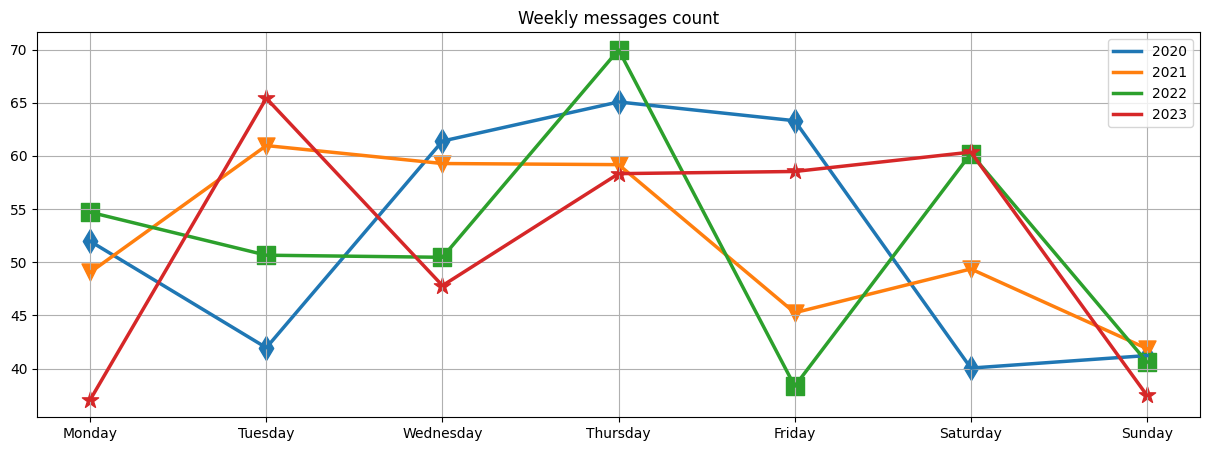

In [55]:
l1 = ['2020', '2021','2022', '2023']
xt3 = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
t1 = 'Weekly messages count'
plot_stats_line(t[2:], labels=l1, x_ticks=xt3, file_name='weekly_count.pdf', title=t1)

In [51]:
df.msg_type.unique()

array(['text', 'photo', 'file', 'link', 'video_file', 'sticker',
       'voice_message', 'animation', 'poll', 'location', 'video_message',
       'audio_file'], dtype=object)

In [52]:
PVA_stats = {j: {i:[] for i in range(2018, 2024)} for j in ['text', 'photo', 'link', 'video_file']}
AMI_stats = {j: {i:[] for i in range(2018, 2024)} for j in ['text', 'photo', 'link', 'video_file']}

In [53]:
for msg_type in PVA_stats.keys():
    for year in PVA_stats[msg_type].keys():
        for i in range(12):
            PVA_stats[msg_type][year].append(df.where((df.date.dt.year == year) &
                                                      (df.date.dt.month == 1+i) &
                                                      (df.msg_type == msg_type) &
                                                      (df.sender == 'PVA')).count().msg_id)

In [56]:
PVA_stats

{'text': {2018: [0, 0, 0, 0, 0, 0, 0, 0, 0, 36, 0, 0],
  2019: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 45],
  2020: [61, 48, 88, 331, 87, 204, 176, 276, 301, 287, 148, 120],
  2021: [350, 150, 162, 86, 121, 332, 352, 463, 349, 236, 207, 247],
  2022: [186, 133, 157, 365, 369, 416, 354, 280, 217, 213, 285, 171],
  2023: [229, 171, 213, 195, 204, 230, 16, 169, 42, 0, 0, 0]},
 'photo': {2018: [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0],
  2019: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1],
  2020: [7, 1, 7, 20, 11, 18, 26, 17, 27, 29, 10, 7],
  2021: [23, 27, 25, 25, 11, 14, 21, 23, 17, 16, 9, 19],
  2022: [27, 18, 22, 30, 21, 30, 15, 23, 29, 14, 29, 13],
  2023: [11, 20, 28, 17, 35, 16, 0, 13, 4, 0, 0, 0]},
 'link': {2018: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
  2019: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
  2020: [2, 0, 5, 6, 2, 4, 3, 4, 4, 2, 0, 1],
  2021: [1, 0, 2, 1, 1, 2, 5, 4, 2, 11, 5, 7],
  2022: [6, 5, 5, 6, 8, 6, 8, 17, 5, 20, 15, 10],
  2023: [11, 11, 5, 8, 13, 25, 0, 14, 4, 0, 0, 0]},
 'video_fi

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (12,).

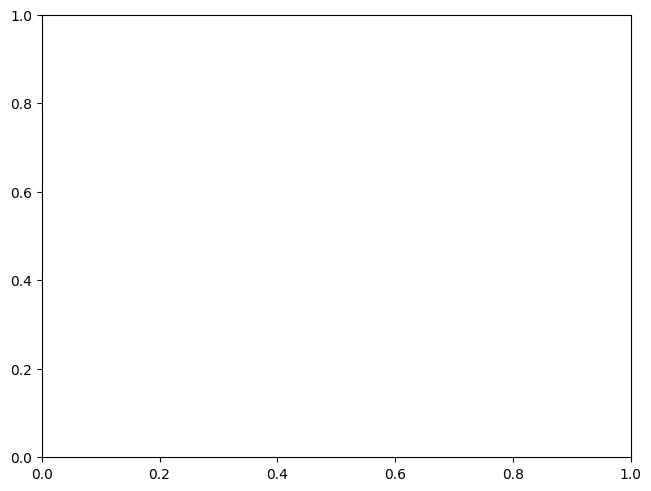